In [1]:
!pip install folium
import folium
import pandas as pd
import numpy as np
import requests
!pip install beautifulsoup4
!pip install lxml
from bs4 import BeautifulSoup
!pip install geopy
from geopy.geocoders import Nominatim

     |████████████████████████████████| 92kB 1.5MB/s eta 0:00:01


<h3>Define variables to be used for calls to the FourSquare API.</h3>

In [2]:
client_id = 'ZH3EGCCGTUVO005IHZCHZOYDQN1LQKMKI3B1NREY2HBQKKSZ'
client_secret = 'KOKGU22BQFVB55MVMWQY4QVR2SVCHEADLLM5LWDK0EOWIDJ3'
version = '20180605'
lat = 37.77
lng = -122.42
radius = 10000
limit = 100
query_j = 'Japanese Restaurant'
query_c = 'Chinese Restaurant'
query_i = 'Italian Restaurant'

<h1>Part 1: Distribution of various ethnic restaurants in San Francisco</h1>

<h3>Get Japanese restaurants in SF</h3>

In [3]:
#Get data from foursquare and store in a variable after making results more precise
url_j = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(client_id,client_secret,version,lat,lng,radius,limit,query_j)
results_j = requests.get(url_j).json()
results_filt_j = results_j['response']['groups'][0]['items']
results_filt_j

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '45e98072f964a5207e431fe3',
   'name': 'Eiji',
   'location': {'address': '317 Sanchez St',
    'crossStreet': 'at 16th St',
    'lat': 37.76407919468008,
    'lng': -122.43086041060077,
    'labeledLatLngs': [{'label': 'display',
      'lat': 37.76407919468008,
      'lng': -122.43086041060077}],
    'distance': 1160,
    'postalCode': '94114',
    'cc': 'US',
    'neighborhood': 'Mission Dolores',
    'city': 'San Francisco',
    'state': 'CA',
    'country': 'United States',
    'formattedAddress': ['317 Sanchez St (at 16th St)',
     'San Francisco, CA 94114',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d111941735',
     'name': 'Japanese Restaurant',
     'pluralName': 'Japanese Restaurants',
     'shortName': 'Japanese',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese

In [4]:
#append the relevant data from results_filt to a list, then convert to a dataframe.
japanese_list = []

japanese_list.append([(
    j['venue']['name'],
    j['venue']['location']['lat'],
    j['venue']['location']['lng'],
    j['venue']['categories'][0]['name']) for j in results_filt_j])

japanese_df = pd.DataFrame(x for y in japanese_list for x in y)
japanese_df.columns = ['Restaurant Name', 'Restaurant Latitude', 'Restaurant Longitude', 'Restaurant Category']
japanese_df.head()

Restaurant Name  Restaurant Latitude  Restaurant Longitude  \
0               Eiji            37.764079           -122.430860   
1            Rintaro            37.768754           -122.415132   
2            Hashiri            37.782994           -122.407833   
3  Nojo Ramen Tavern            37.776637           -122.421270   
4           Benkyodo            37.786422           -122.430053   

   Restaurant Category  
0  Japanese Restaurant  
1  Japanese Restaurant  
2  Japanese Restaurant  
3  Japanese Restaurant  
4  Japanese Restaurant

In [5]:
url_c = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(client_id,client_secret,version,lat,lng,radius,limit,query_c)
results_c = requests.get(url_c).json()
results_filt_c = results_c['response']['groups'][0]['items']
results_filt_c

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4c325dd83896e21e6d6ee890',
   'name': 'Mission Chinese Food',
   'location': {'address': '2234 Mission St',
    'crossStreet': 'btwn 18th & 19th St',
    'lat': 37.76118615249867,
    'lng': -122.41939496055302,
    'labeledLatLngs': [{'label': 'display',
      'lat': 37.76118615249867,
      'lng': -122.41939496055302}],
    'distance': 982,
    'postalCode': '94110',
    'cc': 'US',
    'city': 'San Francisco',
    'state': 'CA',
    'country': 'United States',
    'formattedAddress': ['2234 Mission St (btwn 18th & 19th St)',
     'San Francisco, CA 94110',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d145941735',
     'name': 'Chinese Restaurant',
     'pluralName': 'Chinese Restaurants',
     'shortName': 'Chinese',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
      

In [6]:
chinese_list = []

chinese_list.append([(
    c['venue']['name'],
    c['venue']['location']['lat'],
    c['venue']['location']['lng'],
    c['venue']['categories'][0]['name']) for c in results_filt_c])

chinese_df = pd.DataFrame(x for y in chinese_list for x in y)
chinese_df.columns = ['Restaurant Name', 'Restaurant Latitude', 'Restaurant Longitude', 'Restaurant Category']
chinese_df.head()

Restaurant Name  Restaurant Latitude  Restaurant Longitude  \
0  Mission Chinese Food            37.761186           -122.419395   
1         Dumpling Time            37.769812           -122.402460   
2            China Live            37.798027           -122.407858   
3           Wild Pepper            37.748740           -122.421500   
4          Mister Jiu's            37.793790           -122.406615   

  Restaurant Category  
0  Chinese Restaurant  
1  Chinese Restaurant  
2  Chinese Restaurant  
3  Chinese Restaurant  
4  Chinese Restaurant

<h3>Get Italian restaurants in SF.</h3>

In [7]:
url_i = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(client_id,client_secret,version,lat,lng,radius,limit,query_i)
results_i = requests.get(url_i).json()
results_i_filt = results_i['response']['groups'][0]['items']
results_i_filt

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4a8b6942f964a520660c20e3',
   'name': 'flour + water',
   'location': {'address': '2401 Harrison St',
    'crossStreet': 'at 20th St',
    'lat': 37.75906211575193,
    'lng': -122.41233362890493,
    'labeledLatLngs': [{'label': 'display',
      'lat': 37.75906211575193,
      'lng': -122.41233362890493}],
    'distance': 1392,
    'postalCode': '94110',
    'cc': 'US',
    'city': 'San Francisco',
    'state': 'CA',
    'country': 'United States',
    'formattedAddress': ['2401 Harrison St (at 20th St)',
     'San Francisco, CA 94110',
     'United States']},
   'categories': [{'id': '4bf58dd8d48988d110941735',
     'name': 'Italian Restaurant',
     'pluralName': 'Italian Restaurants',
     'shortName': 'Italian',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
      'suffix': '.png'},
 

In [8]:
italian_list = []

italian_list.append([(
    i['venue']['name'],
    i['venue']['location']['lat'],
    i['venue']['location']['lng'],
    i['venue']['categories'][0]['name']) for i in results_i_filt])

italian_df = pd.DataFrame(x for y in italian_list for x in y)
italian_df.columns = ['Restaurant Name', 'Restaurant Latitude', 'Restaurant Longitude', 'Restaurant Category']
italian_df.head()

Restaurant Name  Restaurant Latitude  Restaurant Longitude  \
0   flour + water            37.759062           -122.412334   
1          a Mano            37.776917           -122.423856   
2         Delfina            37.761528           -122.424272   
3         Locanda            37.764088           -122.421769   
4         Beretta            37.753741           -122.420799   

  Restaurant Category  
0  Italian Restaurant  
1  Italian Restaurant  
2  Italian Restaurant  
3  Italian Restaurant  
4  Italian Restaurant

In [9]:
sf_map = folium.Map(location = [lat,lng], zoom_start=12)

In [10]:
#Add Japanese restaurants to the map
for name, lat, lng, cat in zip(japanese_df['Restaurant Name'], japanese_df['Restaurant Latitude'], japanese_df['Restaurant Longitude'], japanese_df['Restaurant Category']):
    label = '{}, {}'.format(name,cat)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup= label,
        color = 'Red'
    ).add_to(sf_map)

In [11]:
#Add Chinese restaurants to the map
for name, lat, lng, cat in zip(chinese_df['Restaurant Name'], chinese_df['Restaurant Latitude'], chinese_df['Restaurant Longitude'], chinese_df['Restaurant Category']):
    label = '{}, {}'.format(name,cat)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup= label,
        color = 'Blue'
    ).add_to(sf_map)

In [12]:
#Add Italian restaurants to the map
for name, lat, lng, cat in zip(italian_df['Restaurant Name'], italian_df['Restaurant Latitude'], italian_df['Restaurant Longitude'], italian_df['Restaurant Category']):
    label = '{}, {}'.format(name,cat)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup= label,
        color = 'Green'
    ).add_to(sf_map)
    
sf_map

<h3>Parse SF into neighbourhoods with geoJSON file.</h3>

In [13]:
sf_geo = 'https://public.boxcloud.com/d/1/b1!sdxLOgSoNHgFEtQt29lg8HjDzcp5Zn7RKWAhkMmfciF0X86K__SmtqYmhIY7OJvtI5AfbeD9e4KcJwaSCkwpNJg5Y1IcQTXwcMTXJI9aPu9VSZ35VS6AzTC6isvdZpAGejr8_kzmne9lUe03u9lCK5GlozUoXDs1lN-Wus5V-YuPkScHfMlKeVEsJpgBhGcfjVDtOj_LaaUnm6HCEXt_QxJYYsGOHs7kTz_mkFgRKq8rYVwSy12MvjiiYxxmoh6FGY5GDrBKh13V5iByYWQU8M_PDLmXC_F5ndbjvQa81O3uJSvbIE0ev74JOZ4dMidSxYvhBzJ5iz8xTPmQH372diCvaFtDdyoxwIu46gxuEvangPR5t2XjKQh5Yp5T5pDQvoe7119uvKqEdwdqAB38Ag8ee3Gz3gUPDgkatR_qnMgoQ3CApu6mFClxIHWG9h5yEpuSHrxXrTuw9KZiDRcA9Fv8e8PBklfP_HFD8pooKAbDfeU_IBscbF5cWLgxgll7Krs6yH56iqRONiNxr1wVsNN0f5coDTfE2b_KEXW4ydExljfvpJEQfVnPqMXzR6lTrKJGscc_hHk4zrf8LmdE46gfaY3mA3ZYjjBlIhBhnksRGrkvcHrscUIVTq25xmMcQMODAsQ4ft6pxIdP17u0xIzEvjTNVnnolVl1yxScPQwhzW4dJyZAiv1zarZK6TIixgMAKP7j3PH6hRgXKdldipooWlfXjlKZ3mOrpxjzBVKjMRkPQPiqa2Qvr4c0YRJqjH_3zJoZ9gGfJ0SQ6Gn-hOgUd7DpEqdh6tHv-em2QQV3deQS9Rjb_Jb6Nh5u64M3nFNVCtEvs8tAdKWiUGI1gs4mrrBszNPhX5-KT3Qruk_SWnbLPHkG2MnPtVQRn1u-8hRQBPko64lkxPS2xjYUYflxrc9IvJalkNKFLjqwWcRhRBUkSNWSP4uKMLN7wuAdDpV2KQbORYuMpx_rP7x6B7OoL5fejUxhYQMWbIGuXJHk4idjlIv7BLRoN8_yMigPBTXzkTzS24_SszhstiBxiEtIGbqPmSBCO7M15E-Wy4TyKZDl8-UGRDVC1IzP0gAUSGtKO-hAkVneCBQmry_SoOkTNr6ER-W2VZOulTEvHVCtsku8blDhlv7rCugG_D2KvU-jN0jeJCqQkCByfcl9eYq-cbzVs4H6XuJnrYWNCh41JgJtbnb9_zAFSzOqaz-Z7Tu0_xpEGyehZCTW0Fj6zQz2A5OFT0qdxDl5cEwC1-BdgpQPJFyvzEyK9sL8beABBRZq80fp0ykxIiWbRGpGkxJfPDiTQyjHvW3McfnpmNYaIGLK9N83ZKGIMGPe_tZ1pGEnuVece3-F3gw_j3egkXjT2E2OsXpoGdIfANZHpvD8DxCapfkyX6b31r4n2pxvJRq3oeA./download'

In [14]:
sf_map.choropleth(
    geo_data = sf_geo,
    fill_opacity = 0
)
sf_map

/opt/conda/envs/Python36/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


<h3>Use the geoJSON file to make polygon shapes to determine which district a particular restaurant is in.</h3>

In [15]:
import json
!pip install shapely
from shapely.geometry import shape, Point
from shapely.geometry import Polygon

     |████████████████████████████████| 1.5MB 1.7MB/s eta 0:00:01


In [16]:
sf_geo_data = requests.get(sf_geo).json()
sf_geo_data

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1, 'DISTRICT': 'CENTRAL', 'COMPANY': 'A'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-122.40532134644249, 37.806867516866724],
      [-122.40440122046421, 37.80885380837723],
      [-122.40438743872008, 37.80886519707406],
      [-122.40436730880846, 37.808872966044206],
      [-122.40434376667437, 37.808869624109605],
      [-122.40431429421082, 37.80881799170733],
      [-122.40394067997407, 37.80876198999871],
      [-122.40392016838871, 37.808754877186864],
      [-122.40390555965932, 37.808734021463344],
      [-122.40390814512642, 37.80871288836611],
      [-122.40471878715235, 37.80696905969842],
      [-122.4039597318324, 37.80657809724],
      [-122.4027673862454, 37.80801170771318],
      [-122.40274578869823, 37.80802322234157],
      [-122.40271771623641, 37.80802615647638],
      [-

In [17]:
sf_geo_data

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 1, 'DISTRICT': 'CENTRAL', 'COMPANY': 'A'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-122.40532134644249, 37.806867516866724],
      [-122.40440122046421, 37.80885380837723],
      [-122.40438743872008, 37.80886519707406],
      [-122.40436730880846, 37.808872966044206],
      [-122.40434376667437, 37.808869624109605],
      [-122.40431429421082, 37.80881799170733],
      [-122.40394067997407, 37.80876198999871],
      [-122.40392016838871, 37.808754877186864],
      [-122.40390555965932, 37.808734021463344],
      [-122.40390814512642, 37.80871288836611],
      [-122.40471878715235, 37.80696905969842],
      [-122.4039597318324, 37.80657809724],
      [-122.4027673862454, 37.80801170771318],
      [-122.40274578869823, 37.80802322234157],
      [-122.40271771623641, 37.80802615647638],
      [-

<h3>Can't get for loop to read through coordinates of each neighborhood in geoJSON file. So, will have to do them individually.</h3>

<h5>Step 1: Concat all restaurants into one file.</h5>

In [19]:
restaurants_df = pd.concat([japanese_df,chinese_df,italian_df], axis=0)
restaurants_df.reset_index(inplace=True)
restaurants_df.drop('index',axis=1,inplace=True)
restaurants_df.head()

Restaurant Name  Restaurant Latitude  Restaurant Longitude  \
0               Eiji            37.764079           -122.430860   
1            Rintaro            37.768754           -122.415132   
2            Hashiri            37.782994           -122.407833   
3  Nojo Ramen Tavern            37.776637           -122.421270   
4           Benkyodo            37.786422           -122.430053   

   Restaurant Category  
0  Japanese Restaurant  
1  Japanese Restaurant  
2  Japanese Restaurant  
3  Japanese Restaurant  
4  Japanese Restaurant

<h5>Step 2: Prep coordinates of each neighborhood individually (10 in total) + Use Shapely functions (Point, Polygon) to what neighborhood in which each restaurant falls</h5>

In [21]:
#Neighborhood 1: CENTRAL

#Get coordinates + reshape into a two-dimensional list.
nei_1 = np.array(sf_geo_data['features'][0]['geometry']['coordinates'])
nei_1 = nei_1.reshape(725,2)

nei_1_list = []

#Retrieve the latitude, longitude, name, and category of all venues belonging the the Central neighborhood. 
for lng, lat, name, cat in zip(restaurants_df['Restaurant Longitude'], restaurants_df['Restaurant Latitude'], restaurants_df['Restaurant Name'], restaurants_df['Restaurant Category']):
    point_1 = Point(lng, lat)
    poly_1 = Polygon(nei_1)
    if poly_1.contains(point_1):
        nei_1_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'CENTRAL')])

#Convert the list to a dataframe.
nei_1_df = pd.DataFrame(x for y in nei_1_list for x in y)
nei_1_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']
nei_1_df.head()

#Repeat for the rest of the 10 neighborhoods.

Name             Category   Longitude  \
0                           Sanraku  Japanese Restaurant -122.412067   
1                         Roka Akor  Japanese Restaurant -122.403850   
2    Akiko’s Restaurant & Sushi Bar  Japanese Restaurant -122.404657   
3                              PABU  Japanese Restaurant -122.398100   
4  Muracci's Japanese Curry & Grill  Japanese Restaurant -122.404282   

    Latitude Neighborhood  
0  37.788770      CENTRAL  
1  37.796336      CENTRAL  
2  37.790623      CENTRAL  
3  37.792950      CENTRAL  
4  37.791000      CENTRAL

In [22]:
#Neighborhood 2: SOUTHERN
nei_2 = sf_geo_data['features'][1]['geometry']['coordinates']
nei_2 = nei_2[0][0]

nei_2_list = []

for lng, lat, name, cat in zip(restaurants_df['Restaurant Longitude'], restaurants_df['Restaurant Latitude'], restaurants_df['Restaurant Name'], restaurants_df['Restaurant Category']):
    point_2 = Point(lng, lat)
    poly_2 = Polygon(nei_2)
    if poly_2.contains(point_2):
        nei_2_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'SOUTHERN')])
nei_2_df = pd.DataFrame(x for y in nei_2_list for x in y)
nei_2_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']
nei_2_df.head()

Name             Category   Longitude   Latitude Neighborhood
0       Hashiri  Japanese Restaurant -122.407833  37.782994     SOUTHERN
1         Okane  Japanese Restaurant -122.403172  37.770727     SOUTHERN
2         Ozumo  Japanese Restaurant -122.392172  37.792659     SOUTHERN
3      Onigilly  Japanese Restaurant -122.398746  37.790749     SOUTHERN
4  Izakaya Roku  Japanese Restaurant -122.423976  37.771341     SOUTHERN

In [23]:
#Neighborhood 3: BAYVIEW
nei_3 = np.array(sf_geo_data['features'][2]['geometry']['coordinates'])
nei_3 = nei_3.reshape(856,2)

nei_3_list = []

for lng, lat, name, cat in zip(restaurants_df['Restaurant Longitude'], restaurants_df['Restaurant Latitude'], restaurants_df['Restaurant Name'], restaurants_df['Restaurant Category']):
    point_3 = Point(lng, lat)
    poly_3 = Polygon(nei_3)
    if poly_3.contains(point_3):
        nei_3_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'BAYVIEW')])
nei_3_df = pd.DataFrame(x for y in nei_3_list for x in y)
nei_3_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']
nei_3_df

Name             Category   Longitude   Latitude  \
0                  Live Sushi Bar  Japanese Restaurant -122.403676  37.764694   
1                     Moshi Moshi  Japanese Restaurant -122.388888  37.763133   
2                    Koja Kitchen  Japanese Restaurant -122.391227  37.771027   
3                             Umi  Japanese Restaurant -122.396134  37.762670   
4  Marcella's Lasagneria & Cucina   Italian Restaurant -122.389235  37.757996   
5                    Piccino Cafe   Italian Restaurant -122.390145  37.757738   

  Neighborhood  
0      BAYVIEW  
1      BAYVIEW  
2      BAYVIEW  
3      BAYVIEW  
4      BAYVIEW  
5      BAYVIEW

In [24]:
#Neighborhood 4: MISSION
nei_4 = np.array(sf_geo_data['features'][3]['geometry']['coordinates'])
nei_4 = nei_4.reshape(489,2)

nei_4_list = []

for lng, lat, name, cat in zip(restaurants_df['Restaurant Longitude'], restaurants_df['Restaurant Latitude'], restaurants_df['Restaurant Name'], restaurants_df['Restaurant Category']):
    point_4 = Point(lng, lat)
    poly_4 = Polygon(nei_4)
    if poly_4.contains(point_4):
        nei_4_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'BAYVIEW')])
nei_4_df = pd.DataFrame(x for y in nei_4_list for x in y)
nei_4_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']
nei_4_df.head()

Name             Category   Longitude   Latitude  \
0                 Eiji  Japanese Restaurant -122.430860  37.764079   
1              Rintaro  Japanese Restaurant -122.415132  37.768754   
2            Bon, Nene  Japanese Restaurant -122.411542  37.757570   
3           Sushi Time  Japanese Restaurant -122.432171  37.764565   
4  Nihon Whisky Lounge  Japanese Restaurant -122.415629  37.768661   

  Neighborhood  
0      BAYVIEW  
1      BAYVIEW  
2      BAYVIEW  
3      BAYVIEW  
4      BAYVIEW

In [25]:
#Neighborhood 5: PARK
nei_5 = np.array(sf_geo_data['features'][4]['geometry']['coordinates'])
nei_5 = nei_5.reshape(539,2)

nei_5_list = []

for lng, lat, name, cat in zip(restaurants_df['Restaurant Longitude'], restaurants_df['Restaurant Latitude'], restaurants_df['Restaurant Name'], restaurants_df['Restaurant Category']):
    point_5 = Point(lng, lat)
    poly_5 = Polygon(nei_5)
    if poly_5.contains(point_5):
        nei_5_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'PARK')])
nei_5_df = pd.DataFrame(x for y in nei_5_list for x in y)
nei_5_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']
nei_5_df.head()

Name             Category   Longitude   Latitude Neighborhood
0                Koo  Japanese Restaurant -122.462439  37.764278         PARK
1              jū-ni     Sushi Restaurant -122.438770  37.776743         PARK
2            Tsunami     Sushi Restaurant -122.438486  37.776869         PARK
3    People’s Bistro   Chinese Restaurant -122.445782  37.770137         PARK
4  Little Star Pizza   Italian Restaurant -122.438281  37.777489         PARK

In [26]:
#Neighborhood 6: RICHMOND
nei_6 = np.array(sf_geo_data['features'][5]['geometry']['coordinates'])
nei_6 = nei_6.reshape(1035,2)

nei_6_list = []

for lng, lat, name, cat in zip(restaurants_df['Restaurant Longitude'], restaurants_df['Restaurant Latitude'], restaurants_df['Restaurant Name'], restaurants_df['Restaurant Category']):
    point_6 = Point(lng, lat)
    poly_6 = Polygon(nei_6)
    if poly_6.contains(point_6):
        nei_6_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'RICHMOND')])
nei_6_df = pd.DataFrame(x for y in nei_6_list for x in y)
nei_6_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']
nei_6_df.head()

Name             Category   Longitude   Latitude Neighborhood
0          Wako  Japanese Restaurant -122.461576  37.783032     RICHMOND
1          Halu  Japanese Restaurant -122.466528  37.782526     RICHMOND
2   Shabu House  Japanese Restaurant -122.463287  37.783127     RICHMOND
3    Shabu Club  Japanese Restaurant -122.469599  37.782638     RICHMOND
4  Sushi Bistro  Japanese Restaurant -122.463561  37.777183     RICHMOND

In [27]:
#Neighborhood 7: INGLESIDE
nei_7 = np.array(sf_geo_data['features'][6]['geometry']['coordinates'])
nei_7 = nei_7.reshape(767,2)

nei_7_list = []

for lng, lat, name, cat in zip(restaurants_df['Restaurant Longitude'], restaurants_df['Restaurant Latitude'], restaurants_df['Restaurant Name'], restaurants_df['Restaurant Category']):
    point_7 = Point(lng, lat)
    poly_7 = Polygon(nei_7)
    if poly_7.contains(point_7):
        nei_7_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'INGLESIDE')])
nei_7_df = pd.DataFrame(x for y in nei_7_list for x in y)
nei_7_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']
nei_7_df.head() 

Name             Category   Longitude   Latitude  \
0      Fumi Curry & Ramen  Japanese Restaurant -122.420890  37.744100   
1              ICHI Sushi     Sushi Restaurant -122.421656  37.742796   
2          Doma Sushi Bar     Sushi Restaurant -122.410553  37.747341   
3  Sakesan Sushi | Robata  Japanese Restaurant -122.457454  37.724290   
4       Eric's Restaurant   Chinese Restaurant -122.427028  37.746878   

  Neighborhood  
0    INGLESIDE  
1    INGLESIDE  
2    INGLESIDE  
3    INGLESIDE  
4    INGLESIDE

In [28]:
#Neighborhood 8: TARAVAL
nei_8 = np.array(sf_geo_data['features'][7]['geometry']['coordinates'])
nei_8 = nei_8.reshape(1445,2)

nei_8_list = []

for lng, lat, name, cat in zip(restaurants_df['Restaurant Longitude'], restaurants_df['Restaurant Latitude'], restaurants_df['Restaurant Name'], restaurants_df['Restaurant Category']):
    point_8 = Point(lng, lat)
    poly_8 = Polygon(nei_8)
    if poly_8.contains(point_8):
        nei_8_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'TARAVAL')])
nei_8_df = pd.DataFrame(x for y in nei_8_list for x in y)
nei_8_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']
nei_8_df.head() 

Name             Category  \
0                                              Ebisu  Japanese Restaurant   
1                                      Izakaya Sozai  Japanese Restaurant   
2                                               Nabe  Japanese Restaurant   
3  San Tung Chinese Restaurant 山東小館 (San Tung Chi...   Chinese Restaurant   
4                                  House of Pancakes   Chinese Restaurant   

    Longitude   Latitude Neighborhood  
0 -122.466358  37.764354      TARAVAL  
1 -122.474062  37.763758      TARAVAL  
2 -122.466291  37.763634      TARAVAL  
3 -122.469014  37.763859      TARAVAL  
4 -122.476184  37.742856      TARAVAL

In [29]:
#Neighborhood 9: NORTHERN
nei_9 = np.array(sf_geo_data['features'][8]['geometry']['coordinates'])
nei_9 = nei_9.reshape(464,2)

nei_9_list = []

for lng, lat, name, cat in zip(restaurants_df['Restaurant Longitude'], restaurants_df['Restaurant Latitude'], restaurants_df['Restaurant Name'], restaurants_df['Restaurant Category']):
    point_9 = Point(lng, lat)
    poly_9 = Polygon(nei_9)
    if poly_9.contains(point_9):
        nei_9_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'NORTHERN')])
nei_9_df = pd.DataFrame(x for y in nei_9_list for x in y)
nei_9_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']
nei_9_df.head() 

Name             Category   Longitude   Latitude Neighborhood
0  Nojo Ramen Tavern  Japanese Restaurant -122.421270  37.776637     NORTHERN
1           Benkyodo  Japanese Restaurant -122.430053  37.786422     NORTHERN
2              Robin  Japanese Restaurant -122.423378  37.779127     NORTHERN
3  Kuma Sushi + Sake  Japanese Restaurant -122.419886  37.786780     NORTHERN
4        Izakaya Kou  Japanese Restaurant -122.432851  37.784266     NORTHERN

In [30]:
#Neighborhood 10: TENDERLOIN
nei_10 = np.array(sf_geo_data['features'][9]['geometry']['coordinates'])
nei_10 = nei_10.reshape(63,2)

nei_10_list = []

for lng, lat, name, cat in zip(restaurants_df['Restaurant Longitude'], restaurants_df['Restaurant Latitude'], restaurants_df['Restaurant Name'], restaurants_df['Restaurant Category']):
    point_10 = Point(lng, lat)
    poly_10 = Polygon(nei_10)
    if poly_10.contains(point_10):
        nei_10_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'TENDERLOIN')])
nei_10_df = pd.DataFrame(x for y in nei_10_list for x in y)
nei_10_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']
nei_10_df

Name             Category   Longitude   Latitude Neighborhood
0               Onsen                  Spa -122.415443  37.783642   TENDERLOIN
1          Dojima Ann  Japanese Restaurant -122.408495  37.786367   TENDERLOIN
2     Restaurant Anzu  Japanese Restaurant -122.409542  37.785703   TENDERLOIN
3      Eden Silk Road   Chinese Restaurant -122.414099  37.785731   TENDERLOIN
4            King Kee   Chinese Restaurant -122.408788  37.785523   TENDERLOIN
5  Elmira Rosticceria   Italian Restaurant -122.414806  37.780854   TENDERLOIN

<h5>Step 3: Concatenate all restaurants with now-assigned neighborhoods.</h5>


In [31]:
restaurants_df_final = pd.concat([nei_1_df,nei_2_df,nei_3_df,nei_4_df,nei_5_df,nei_6_df,nei_7_df,nei_8_df,nei_9_df,nei_10_df],axis=0)
restaurants_df_final.reset_index(inplace=True)
restaurants_df_final.drop('index', axis=1, inplace=True)
restaurants_df.head()

Restaurant Name  Restaurant Latitude  Restaurant Longitude  \
0               Eiji            37.764079           -122.430860   
1            Rintaro            37.768754           -122.415132   
2            Hashiri            37.782994           -122.407833   
3  Nojo Ramen Tavern            37.776637           -122.421270   
4           Benkyodo            37.786422           -122.430053   

   Restaurant Category  
0  Japanese Restaurant  
1  Japanese Restaurant  
2  Japanese Restaurant  
3  Japanese Restaurant  
4  Japanese Restaurant

<h5>Step 4: Seperate the dataframe into Japanese, Chinese, and Italian dataframes.</h5>

In [32]:
japanese_restaurants = restaurants_df_final[(restaurants_df_final['Category'] == 'Japanese Restaurant') | (restaurants_df_final['Category'] == 'Sushi Restaurant')]
japanese_restaurants.reset_index(inplace=True)
japanese_restaurants.drop('index', axis=1, inplace=True)
japanese_restaurants[13:19]

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Name             Category   Longitude   Latitude Neighborhood
13     Okoze Sushi     Sushi Restaurant -122.419266  37.799191      CENTRAL
14  Elephant Sushi     Sushi Restaurant -122.418939  37.798623      CENTRAL
15      Sushirrito     Sushi Restaurant -122.401675  37.794820      CENTRAL
16   Tokyo Express  Japanese Restaurant -122.399660  37.792122      CENTRAL
17         Hashiri  Japanese Restaurant -122.407833  37.782994     SOUTHERN
18           Okane  Japanese Restaurant -122.403172  37.770727     SOUTHERN

In [33]:
chinese_restaurants = restaurants_df_final[restaurants_df_final['Category'] == 'Chinese Restaurant']
chinese_restaurants.reset_index(inplace=True)
chinese_restaurants.drop('index', axis=1, inplace=True)
chinese_restaurants[89:95]

Name            Category   Longitude   Latitude  \
89            Cheung Hing  Chinese Restaurant -122.488911  37.753750   
90           Ming's Diner  Chinese Restaurant -122.489171  37.742459   
91      Bamboo Restaurant  Chinese Restaurant -122.420675  37.790165   
92  Wonderland Restaurant  Chinese Restaurant -122.430554  37.772186   
93    San Wang Restaurant  Chinese Restaurant -122.429396  37.785738   
94       Gourmet Carousel  Chinese Restaurant -122.423813  37.789148   

   Neighborhood  
89      TARAVAL  
90      TARAVAL  
91     NORTHERN  
92     NORTHERN  
93     NORTHERN  
94     NORTHERN

In [34]:
italian_restaurants = restaurants_df_final[restaurants_df_final['Category'] == 'Italian Restaurant']
italian_restaurants.reset_index(inplace=True)
italian_restaurants.drop('index', axis=1, inplace=True)
italian_restaurants[71:77]

Name            Category   Longitude   Latitude  \
71                Fiorella  Italian Restaurant -122.484510  37.781887   
72                 Osteria  Italian Restaurant -122.446926  37.788162   
73      Giorgio's Pizzeria  Italian Restaurant -122.461098  37.783091   
74               La Ciccia  Italian Restaurant -122.426531  37.742008   
75  Emmy's Spaghetti Shack  Italian Restaurant -122.420346  37.745022   
76                 Manzoni  Italian Restaurant -122.433898  37.734678   

   Neighborhood  
71     RICHMOND  
72     RICHMOND  
73     RICHMOND  
74    INGLESIDE  
75    INGLESIDE  
76    INGLESIDE

<h3>Map the different ethnic restaurants into their respective choropleth maps.</h3>

<h5>Create dataframes which count the number of ethnic restaurants in each neighborhood.</h5>

In [36]:
#Japanese neighborhood count
j_grouped = [['CENTRAL',len(japanese_restaurants[japanese_restaurants['Neighborhood'] == 'CENTRAL'])],
             ['SOUTHERN',len(japanese_restaurants[japanese_restaurants['Neighborhood'] == 'SOUTHERN'])],
             ['BAYVIEW',len(japanese_restaurants[japanese_restaurants['Neighborhood'] == 'BAYVIEW'])],
             ['MISSION',len(japanese_restaurants[japanese_restaurants['Neighborhood'] == 'MISSION'])],
             ['PARK',len(japanese_restaurants[japanese_restaurants['Neighborhood'] == 'PARK'])],
             ['RICHMOND',len(japanese_restaurants[japanese_restaurants['Neighborhood'] == 'RICHMOND'])],
             ['INGLESIDE',len(japanese_restaurants[japanese_restaurants['Neighborhood'] == 'INGLESIDE'])],
             ['TARAVAL',len(japanese_restaurants[japanese_restaurants['Neighborhood'] == 'TARAVAL'])],
             ['NORTHERN',len(japanese_restaurants[japanese_restaurants['Neighborhood'] == 'NORTHERN'])],
             ['TENDERLOIN',len(japanese_restaurants[japanese_restaurants['Neighborhood'] == 'TENDERLOIN'])]
            ]
j_count = pd.DataFrame(j_grouped)
j_count.columns = ['Neighborhood','Japanese Restaurant Count']
j_count

Neighborhood  Japanese Restaurant Count
0      CENTRAL                         17
1     SOUTHERN                         16
2      BAYVIEW                         18
3      MISSION                          0
4         PARK                          3
5     RICHMOND                         12
6    INGLESIDE                          4
7      TARAVAL                          3
8     NORTHERN                         24
9   TENDERLOIN                          2

In [37]:
#Chinese neighborhood count
c_grouped = [['CENTRAL',len(chinese_restaurants[chinese_restaurants['Neighborhood'] == 'CENTRAL'])],
             ['SOUTHERN',len(chinese_restaurants[chinese_restaurants['Neighborhood'] == 'SOUTHERN'])],
             ['BAYVIEW',len(chinese_restaurants[chinese_restaurants['Neighborhood'] == 'BAYVIEW'])],
             ['MISSION',len(chinese_restaurants[chinese_restaurants['Neighborhood'] == 'MISSION'])],
             ['PARK',len(chinese_restaurants[chinese_restaurants['Neighborhood'] == 'PARK'])],
             ['RICHMOND',len(chinese_restaurants[chinese_restaurants['Neighborhood'] == 'RICHMOND'])],
             ['INGLESIDE',len(chinese_restaurants[chinese_restaurants['Neighborhood'] == 'INGLESIDE'])],
             ['TARAVAL',len(chinese_restaurants[chinese_restaurants['Neighborhood'] == 'TARAVAL'])],
             ['NORTHERN',len(chinese_restaurants[chinese_restaurants['Neighborhood'] == 'NORTHERN'])],
             ['TENDERLOIN',len(chinese_restaurants[chinese_restaurants['Neighborhood'] == 'TENDERLOIN'])]
            ]
c_count = pd.DataFrame(c_grouped)
c_count.columns = ['Neighborhood','Chinese Restaurant Count']
c_count

Neighborhood  Chinese Restaurant Count
0      CENTRAL                        31
1     SOUTHERN                         8
2      BAYVIEW                         9
3      MISSION                         0
4         PARK                         1
5     RICHMOND                        17
6    INGLESIDE                         4
7      TARAVAL                        21
8     NORTHERN                         6
9   TENDERLOIN                         2

In [38]:
#Italian Neighborhood count
i_grouped = [['CENTRAL',len(italian_restaurants[italian_restaurants['Neighborhood'] == 'CENTRAL'])],
             ['SOUTHERN',len(italian_restaurants[italian_restaurants['Neighborhood'] == 'SOUTHERN'])],
             ['BAYVIEW',len(italian_restaurants[italian_restaurants['Neighborhood'] == 'BAYVIEW'])],
             ['MISSION',len(italian_restaurants[italian_restaurants['Neighborhood'] == 'MISSION'])],
             ['PARK',len(italian_restaurants[italian_restaurants['Neighborhood'] == 'PARK'])],
             ['RICHMOND',len(italian_restaurants[italian_restaurants['Neighborhood'] == 'RICHMOND'])],
             ['INGLESIDE',len(italian_restaurants[italian_restaurants['Neighborhood'] == 'INGLESIDE'])],
             ['TARAVAL',len(italian_restaurants[italian_restaurants['Neighborhood'] == 'TARAVAL'])],
             ['NORTHERN',len(italian_restaurants[italian_restaurants['Neighborhood'] == 'NORTHERN'])],
             ['TENDERLOIN',len(italian_restaurants[italian_restaurants['Neighborhood'] == 'TENDERLOIN'])]
            ]
i_count = pd.DataFrame(i_grouped)
i_count.columns = ['Neighborhood','Italian Restaurant Count']
i_count

Neighborhood  Italian Restaurant Count
0      CENTRAL                        43
1     SOUTHERN                         7
2      BAYVIEW                        16
3      MISSION                         0
4         PARK                         2
5     RICHMOND                         6
6    INGLESIDE                         6
7      TARAVAL                         0
8     NORTHERN                        17
9   TENDERLOIN                         1

<h3>Create choropleth maps which display the distribution of the various ethnic restaurants within San Francisco.</h3>

In [39]:
#Japanese Map
sf_japanese_map = folium.Map(location = [lat,lng], zoom_start = 12)
sf_japanese_map.choropleth(
    geo_data = sf_geo,
    data = j_count,
    columns = ['Neighborhood','Japanese Restaurant Count'],
    key_on = 'feature.properties.DISTRICT',
    fill_color = 'YlOrRd',
    threshold_scale = [0,10,20,30,40,50],
    legend_name = 'Number of Restaurants'
)
sf_japanese_map

In [40]:
#Chinese Map
sf_chinese_map = folium.Map(location = [lat,lng], zoom_start = 12)
sf_chinese_map.choropleth(
    geo_data = sf_geo,
    data = c_count,
    columns = ['Neighborhood','Chinese Restaurant Count'],
    key_on = 'feature.properties.DISTRICT',
    fill_color = 'YlOrRd',
    threshold_scale = [0,10,20,30,40,50],
    legend_name = 'Number of Restaurants'
    
)
sf_chinese_map

In [41]:
#Italian Map
sf_italian_map = folium.Map(location = [lat,lng], zoom_start = 12)
sf_italian_map.choropleth(
    geo_data = sf_geo,
    data = i_count,
    columns = ['Neighborhood','Italian Restaurant Count'],
    key_on = 'feature.properties.DISTRICT',
    fill_color = 'YlOrRd',
    threshold_scale = [0,10,20,30,40,50],
    legend_name = 'Number of Restaurants'
)
sf_italian_map

<h1>Part 2: Neighborhood Analysis via Venue Clustering</h1>

<h3>Retrieve venues from FourSquare and append relevant information to a dataframe.</h3>

In [42]:
url_r = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(client_id,client_secret,version,lat,lng,radius,limit)
results_r = requests.get(url_r).json()
results_filt_r = results_r['response']['groups'][0]['items']

In [43]:
venue_list = []

venue_list.append([(
    v['venue']['name'],
    v['venue']['location']['lat'],
    v['venue']['location']['lng'],
    v['venue']['categories'][0]['name']) for v in results_filt_r])

venue_df = pd.DataFrame(x for y in venue_list for x in y)
venue_df.columns = ['Venue Name','Venue Latitude','Venue Longitude','Venue Category']
venue_df.head()

Venue Name  Venue Latitude  Venue Longitude  \
0            Ina Coolbrith Park       37.798314      -122.413612   
1     Collis P. Huntington Park       37.792162      -122.412154   
2         City Lights Bookstore       37.797695      -122.406452   
3                     The House       37.798434      -122.407187   
4  Maritime Wine Tasting Studio       37.797292      -122.405652   

     Venue Category  
0              Park  
1              Park  
2         Bookstore  
3  Asian Restaurant  
4          Wine Bar

<h3>Use Shapely functions (Point, Polygon) to determine the neighborhood in which each restaurant falls.</h3>


In [44]:
#Neighborhood 1: CENTRAL
ven_nei_1_list = []

for lng, lat, name, cat in zip(venue_df['Venue Longitude'], venue_df['Venue Latitude'], venue_df['Venue Name'], venue_df['Venue Category']):
    point_1 = Point(lng, lat)
    poly_1 = Polygon(nei_1)
    if poly_1.contains(point_1):
        ven_nei_1_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'CENTRAL')])
ven_nei_1_df = pd.DataFrame(x for y in ven_nei_1_list for x in y)
ven_nei_1_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']

#Neighborhood 2: SOUTHERN
ven_nei_2_list = []

for lng, lat, name, cat in zip(venue_df['Venue Longitude'], venue_df['Venue Latitude'], venue_df['Venue Name'], venue_df['Venue Category']):
    point_2 = Point(lng, lat)
    poly_2 = Polygon(nei_2)
    if poly_2.contains(point_2):
        ven_nei_2_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'SOUTHERN')])
ven_nei_2_df = pd.DataFrame(x for y in ven_nei_2_list for x in y)
ven_nei_2_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']


#Neighborhood 3: BAYVIEW
ven_nei_3_list = []

for lng, lat, name, cat in zip(venue_df['Venue Longitude'], venue_df['Venue Latitude'], venue_df['Venue Name'], venue_df['Venue Category']):
    point_3 = Point(lng, lat)
    poly_3 = Polygon(nei_3)
    if poly_3.contains(point_3):
        ven_nei_3_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'BAYVIEW')])
ven_nei_3_df = pd.DataFrame(x for y in ven_nei_3_list for x in y)
ven_nei_3_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']


#Neighborhood 4: MISSION
ven_nei_4_list = []

for lng, lat, name, cat in zip(venue_df['Venue Longitude'], venue_df['Venue Latitude'], venue_df['Venue Name'], venue_df['Venue Category']):
    point_4 = Point(lng, lat)
    poly_4 = Polygon(nei_4)
    if poly_4.contains(point_4):
        ven_nei_4_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'BAYVIEW')])
ven_nei_4_df = pd.DataFrame(x for y in ven_nei_4_list for x in y)
ven_nei_4_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']


#Neighborhood 5: PARK
ven_nei_5_list = []

for lng, lat, name, cat in zip(venue_df['Venue Longitude'], venue_df['Venue Latitude'], venue_df['Venue Name'], venue_df['Venue Category']):
    point_5 = Point(lng, lat)
    poly_5 = Polygon(nei_5)
    if poly_5.contains(point_5):
        ven_nei_5_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'PARK')])
ven_nei_5_df = pd.DataFrame(x for y in ven_nei_5_list for x in y)
ven_nei_5_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']


#Neighborhood 6: RICHMOND
ven_nei_6_list = []

for lng, lat, name, cat in zip(venue_df['Venue Longitude'], venue_df['Venue Latitude'], venue_df['Venue Name'], venue_df['Venue Category']):
    point_6 = Point(lng, lat)
    poly_6 = Polygon(nei_6)
    if poly_6.contains(point_6):
        ven_nei_6_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'RICHMOND')])
ven_nei_6_df = pd.DataFrame(x for y in ven_nei_6_list for x in y)
ven_nei_6_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']


#Neighborhood 7: INGLESIDE
ven_nei_7_list = []

for lng, lat, name, cat in zip(venue_df['Venue Longitude'], venue_df['Venue Latitude'], venue_df['Venue Name'], venue_df['Venue Category']):
    point_7 = Point(lng, lat)
    poly_7 = Polygon(nei_7)
    if poly_7.contains(point_7):
        ven_nei_7_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'INGLESIDE')])
ven_nei_7_df = pd.DataFrame(x for y in ven_nei_7_list for x in y)



#Neighborhood 8: TARAVAL
ven_nei_8_list = []

for lng, lat, name, cat in zip(venue_df['Venue Longitude'], venue_df['Venue Latitude'], venue_df['Venue Name'], venue_df['Venue Category']):
    point_8 = Point(lng, lat)
    poly_8 = Polygon(nei_8)
    if poly_8.contains(point_8):
        ven_nei_8_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'TARAVAL')])
ven_nei_8_df = pd.DataFrame(x for y in ven_nei_8_list for x in y)



#Neighborhood 9: NORTHERN
ven_nei_9_list = []

for lng, lat, name, cat in zip(venue_df['Venue Longitude'], venue_df['Venue Latitude'], venue_df['Venue Name'], venue_df['Venue Category']):
    point_9 = Point(lng, lat)
    poly_9 = Polygon(nei_9)
    if poly_9.contains(point_9):
        ven_nei_9_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'NORTHERN')])
ven_nei_9_df = pd.DataFrame(x for y in ven_nei_9_list for x in y)
ven_nei_9_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood']
 

#Neighborhood 10: TENDERLOIN
ven_nei_10_list = []

for lng, lat, name, cat in zip(venue_df['Venue Longitude'], venue_df['Venue Latitude'], venue_df['Venue Name'], venue_df['Venue Category']):
    point_10 = Point(lng, lat)
    poly_10 = Polygon(nei_10)
    if poly_10.contains(point_10):
        ven_nei_10_list.append([(
            name, 
            cat, 
            lng, 
            lat,
            'TENDERLOIN')])
ven_nei_10_df = pd.DataFrame(x for y in ven_nei_10_list for x in y)
ven_nei_10_df.columns = ['Name','Category','Longitude','Latitude','Neighborhood'] 

In [45]:
venue_df = pd.concat([ven_nei_1_df,ven_nei_2_df,ven_nei_3_df,ven_nei_4_df,ven_nei_5_df,ven_nei_6_df,ven_nei_7_df,ven_nei_8_df,ven_nei_9_df,ven_nei_10_df],axis=0)
venue_df.reset_index(inplace=True)
venue_df.drop('index',axis=1,inplace=True)
venue_df[16:24]



Name              Category   Longitude  \
16                  Kokkari Estiatorio      Greek Restaurant -122.399655   
17                  Blue Bottle Coffee           Coffee Shop -122.400983   
18                        Cafe de Casa  Brazilian Restaurant -122.418557   
19                       Exploratorium        Science Museum -122.398556   
20                    View of Alcatraz        Scenic Lookout -122.410751   
21           Flatiron Wine and Spirits             Wine Shop -122.401466   
22                        Trader Joe's         Grocery Store -122.405455   
23  San Francisco Museum of Modern Art            Art Museum -122.400897   

     Latitude Neighborhood  
16  37.796883      CENTRAL  
17  37.791320      CENTRAL  
18  37.806080      CENTRAL  
19  37.800864      CENTRAL  
20  37.811002      CENTRAL  
21  37.788039     SOUTHERN  
22  37.785540     SOUTHERN  
23  37.785894     SOUTHERN

<h3>Convert the venue dataframe to one-hot format.</h3>


In [46]:
venue_onehot = pd.get_dummies(venue_df['Category'])
venue_onehot['Neighborhood'] = venue_df['Neighborhood'] 
fixed_columns = [venue_onehot.columns[-1]] + list(venue_onehot.columns[:-1])
venue_onehot = venue_onehot[fixed_columns]

venue_onehot.head()



Neighborhood  Accessories Store  Art Gallery  Art Museum  Asian Restaurant  \
0      CENTRAL                  0            0           0                 0   
1      CENTRAL                  0            0           0                 0   
2      CENTRAL                  0            0           0                 0   
3      CENTRAL                  0            0           0                 1   
4      CENTRAL                  0            0           0                 0   

   Bakery  Baseball Stadium  Bath House  Bookstore  Brazilian Restaurant  ...  \
0       0                 0           0          0                     0  ...   
1       0                 0           0          0                     0  ...   
2       0                 0           0          1                     0  ...   
3       0                 0           0          0                     0  ...   
4       0                 0           0          0                     0  ...   

   Street Food Gathering  Sushi Restaurant  Tea Room  Theater  Trade School  \
0                      0                 0         0        0             0   
1                      0                 0         0        0             0   
2                      0                 0         0        0             0   
3                      0                 0         0        0             0   
4                      0                 0         0        0             0   

   Trail  Vietnamese Restaurant  Wine Bar  Wine Shop  Yoga Studio  
0      0                      0         0          0            0  
1      0                      0         0          0            0  
2      0                      0         0          0            0  
3      0                      0         0          0            0  
4      0                      0         1          0            0  

[5 rows x 64 columns]

<h5>Group by neighborhood and determine the mean values so that the neighborhoods can be clustered.</h5>


In [47]:
venue_grouped = venue_onehot.groupby('Neighborhood').mean().reset_index()
venue_grouped

Neighborhood  Accessories Store  Art Gallery  Art Museum  Asian Restaurant  \
0      BAYVIEW           0.000000     0.000000    0.000000          0.000000   
1      CENTRAL           0.000000     0.000000    0.000000          0.047619   
2     NORTHERN           0.026316     0.026316    0.000000          0.000000   
3         PARK           0.000000     0.000000    0.000000          0.000000   
4     RICHMOND           0.000000     0.000000    0.000000          0.000000   
5     SOUTHERN           0.000000     0.000000    0.071429          0.000000   
6   TENDERLOIN           0.000000     0.000000    0.333333          0.000000   

     Bakery  Baseball Stadium  Bath House  Bookstore  Brazilian Restaurant  \
0  0.000000          0.000000    0.000000   0.000000              0.000000   
1  0.000000          0.000000    0.000000   0.047619              0.047619   
2  0.026316          0.000000    0.026316   0.026316              0.000000   
3  0.000000          0.000000    0.000000   0.000000              0.000000   
4  0.200000          0.000000    0.000000   0.000000              0.000000   
5  0.000000          0.035714    0.000000   0.000000              0.000000   
6  0.000000          0.000000    0.000000   0.000000              0.000000   

   ...  Street Food Gathering  Sushi Restaurant  Tea Room   Theater  \
0  ...               0.000000          0.000000       0.0  0.000000   
1  ...               0.000000          0.000000       0.0  0.000000   
2  ...               0.026316          0.026316       0.0  0.026316   
3  ...               0.000000          0.000000       0.0  0.000000   
4  ...               0.000000          0.000000       0.2  0.000000   
5  ...               0.000000          0.000000       0.0  0.035714   
6  ...               0.000000          0.000000       0.0  0.333333   

   Trade School     Trail  Vietnamese Restaurant  Wine Bar  Wine Shop  \
0      0.000000  0.000000               0.000000  0.000000   0.000000   
1      0.047619  0.047619               0.000000  0.142857   0.000000   
2      0.000000  0.000000               0.000000  0.026316   0.000000   
3      0.000000  0.000000               0.000000  0.000000   0.000000   
4      0.000000  0.000000               0.000000  0.000000   0.000000   
5      0.000000  0.000000               0.035714  0.000000   0.071429   
6      0.000000  0.000000               0.000000  0.000000   0.000000   

   Yoga Studio  
0     0.000000  
1     0.000000  
2     0.026316  
3     0.000000  
4     0.200000  
5     0.071429  
6     0.000000  

[7 rows x 64 columns]

In [48]:
venue_clustering = venue_grouped.drop('Neighborhood', axis=1)
venue_clustering

Accessories Store  Art Gallery  Art Museum  Asian Restaurant    Bakery  \
0           0.000000     0.000000    0.000000          0.000000  0.000000   
1           0.000000     0.000000    0.000000          0.047619  0.000000   
2           0.026316     0.026316    0.000000          0.000000  0.026316   
3           0.000000     0.000000    0.000000          0.000000  0.000000   
4           0.000000     0.000000    0.000000          0.000000  0.200000   
5           0.000000     0.000000    0.071429          0.000000  0.000000   
6           0.000000     0.000000    0.333333          0.000000  0.000000   

   Baseball Stadium  Bath House  Bookstore  Brazilian Restaurant   Brewery  \
0          0.000000    0.000000   0.000000              0.000000  0.000000   
1          0.000000    0.000000   0.047619              0.047619  0.000000   
2          0.000000    0.026316   0.026316              0.000000  0.000000   
3          0.000000    0.000000   0.000000              0.000000  0.000000   
4          0.000000    0.000000   0.000000              0.000000  0.000000   
5          0.035714    0.000000   0.000000              0.000000  0.035714   
6          0.000000    0.000000   0.000000              0.000000  0.000000   

   ...  Street Food Gathering  Sushi Restaurant  Tea Room   Theater  \
0  ...               0.000000          0.000000       0.0  0.000000   
1  ...               0.000000          0.000000       0.0  0.000000   
2  ...               0.026316          0.026316       0.0  0.026316   
3  ...               0.000000          0.000000       0.0  0.000000   
4  ...               0.000000          0.000000       0.2  0.000000   
5  ...               0.000000          0.000000       0.0  0.035714   
6  ...               0.000000          0.000000       0.0  0.333333   

   Trade School     Trail  Vietnamese Restaurant  Wine Bar  Wine Shop  \
0      0.000000  0.000000               0.000000  0.000000   0.000000   
1      0.047619  0.047619               0.000000  0.142857   0.000000   
2      0.000000  0.000000               0.000000  0.026316   0.000000   
3      0.000000  0.000000               0.000000  0.000000   0.000000   
4      0.000000  0.000000               0.000000  0.000000   0.000000   
5      0.000000  0.000000               0.035714  0.000000   0.071429   
6      0.000000  0.000000               0.000000  0.000000   0.000000   

   Yoga Studio  
0     0.000000  
1     0.000000  
2     0.026316  
3     0.000000  
4     0.200000  
5     0.071429  
6     0.000000  

[7 rows x 63 columns]

<h3>Define a function that returns the most commin venues in each neighborhood and append it to a dataframe.</h3>

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = venue_grouped['Neighborhood']

for ind in np.arange(venue_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venue_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0      BAYVIEW         Grocery Store            Playground   
1      CENTRAL              Wine Bar           Coffee Shop   
2     NORTHERN                  Park                   Gym   
3         PARK                  Park             Rock Club   
4     RICHMOND           Yoga Studio                Bakery   
5     SOUTHERN           Coffee Shop           Yoga Studio   
6   TENDERLOIN            Art Museum               Theater   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Yoga Studio    Italian Restaurant         Historic Site   
1           Men's Store                  Park    Italian Restaurant   
2          Concert Hall          Liquor Store           Coffee Shop   
3           Yoga Studio        Ice Cream Shop   Hawaiian Restaurant   
4              Tea Room    Salon / Barbershop                  Park   
5             Wine Shop        Farmers Market                   Gym   
6   Filipino Restaurant           Yoga Studio                Garden   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0   Hawaiian Restaurant  Gym / Fitness Center                   Gym   
1    Russian Restaurant        Scenic Lookout        Science Museum   
2         Deli / Bodega           Music Venue        Massage Studio   
3  Gym / Fitness Center                   Gym         Grocery Store   
4            Food Truck          Cycle Studio         Deli / Bodega   
5            Art Museum        Clothing Store         Grocery Store   
6          Cycle Studio         Deli / Bodega        Farmers Market   

  9th Most Common Venue 10th Most Common Venue  
0      Greek Restaurant                 Garden  
1  Brazilian Restaurant   Gym / Fitness Center  
2        Ice Cream Shop          Historic Site  
3      Greek Restaurant                 Garden  
4        Farmers Market    Filipino Restaurant  
5                Garden   Marijuana Dispensary  
6            Food Truck          Grocery Store

<h3>Cluster the neighborhoods with a KMeans machine learning algorithm.</h3>

In [50]:
from sklearn.cluster import KMeans

<h5>Determine the optimal number of clusters using the elbow method.</h5>

In [51]:
import matplotlib.pyplot as plt


Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(venue_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'rx')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<Figure size 640x480 with 1 Axes>

<h5>Determine the cluster label of each neighborhood and append it to the ranked venue dataframe.</h5>

In [52]:
venue_clustering = venue_grouped.drop('Neighborhood',axis=1)
k_means = KMeans(init = 'k-means++',n_clusters = 4).fit(venue_clustering)
k_means.labels_

array([1, 0, 0, 2, 0, 0, 3], dtype=int32)

In [53]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', k_means.labels_)

In [54]:
neighborhoods_venues_sorted

Cluster Labels Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               1      BAYVIEW         Grocery Store            Playground   
1               0      CENTRAL              Wine Bar           Coffee Shop   
2               0     NORTHERN                  Park                   Gym   
3               2         PARK                  Park             Rock Club   
4               0     RICHMOND           Yoga Studio                Bakery   
5               0     SOUTHERN           Coffee Shop           Yoga Studio   
6               3   TENDERLOIN            Art Museum               Theater   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Yoga Studio    Italian Restaurant         Historic Site   
1           Men's Store                  Park    Italian Restaurant   
2          Concert Hall          Liquor Store           Coffee Shop   
3           Yoga Studio        Ice Cream Shop   Hawaiian Restaurant   
4              Tea Room    Salon / Barbershop                  Park   
5             Wine Shop        Farmers Market                   Gym   
6   Filipino Restaurant           Yoga Studio                Garden   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0   Hawaiian Restaurant  Gym / Fitness Center                   Gym   
1    Russian Restaurant        Scenic Lookout        Science Museum   
2         Deli / Bodega           Music Venue        Massage Studio   
3  Gym / Fitness Center                   Gym         Grocery Store   
4            Food Truck          Cycle Studio         Deli / Bodega   
5            Art Museum        Clothing Store         Grocery Store   
6          Cycle Studio         Deli / Bodega        Farmers Market   

  9th Most Common Venue 10th Most Common Venue  
0      Greek Restaurant                 Garden  
1  Brazilian Restaurant   Gym / Fitness Center  
2        Ice Cream Shop          Historic Site  
3      Greek Restaurant                 Garden  
4        Farmers Market    Filipino Restaurant  
5                Garden   Marijuana Dispensary  
6            Food Truck          Grocery Store

<h3>Plot a choropleth map that color-coordinates the neighborhoods and their respective cluster.</h3>

In [55]:
ven_map = folium.Map(location = [lat,lng], zoom_start = 12)
ven_map.choropleth(
    geo_data = sf_geo,
    data = neighborhoods_venues_sorted,
    columns = ['Neighborhood','Cluster Labels'],
    key_on = 'feature.properties.DISTRICT',
    fill_color = 'OrRd',
    legend_name = 'CLUSTER 0_______CLUSTER 1_______CLUSTER 2_______CLUSTER 3',
    threshold_scale = [0,1,2,3,4]
)
ven_map

/opt/conda/envs/Python36/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


<h3>Assign each venue their respective cluster label.</h3>

In [56]:
#Look at what occurs in each cluster
#Assign each neighborhood with respective cluster label


#bayview
ven_nei_3_df['Cluster Label'] = np.nan
ven_nei_3_df.replace(np.nan, int(0), inplace=True)

#Central
ven_nei_1_df['Cluster Label'] = np.nan
ven_nei_1_df.replace(np.nan, int(1),inplace=True)

#Northern
ven_nei_9_df['Cluster Label'] = np.nan
ven_nei_9_df.replace(np.nan, int(1), inplace=True)

#Park
ven_nei_5_df['Cluster Label'] = np.nan
ven_nei_5_df.replace(np.nan, int(3), inplace=True)

#Richmond
ven_nei_6_df['Cluster Label'] = np.nan
ven_nei_6_df.replace(np.nan, int(1), inplace=True)

#Southern
ven_nei_2_df['Cluster Label'] = np.nan
ven_nei_2_df.replace(np.nan, int(1), inplace=True)

#Tenderloin
ven_nei_10_df['Cluster Label'] = np.nan
ven_nei_10_df.replace(np.nan, int(2), inplace=True)

#Join neighborhoods and sort by cluster label
venues_clustered = pd.concat([ven_nei_1_df,ven_nei_2_df,ven_nei_3_df,ven_nei_5_df,ven_nei_6_df,ven_nei_9_df,ven_nei_10_df])
venues_clustered.sort_values(by = 'Cluster Label', inplace=True)
venues_clustered.reset_index(inplace=True)
venues_clustered.drop('index',axis=1,inplace=True)
venues_clustered

Name               Category  \
0                         Mission Bay Kids Park             Playground   
1               Off the Grid: Fort Mason Center  Street Food Gathering   
2                                Herbst Theater           Concert Hall   
3                                    Fort Mason                   Park   
4                           Pearl Spa and Sauna             Bath House   
5                          Equinox Union Street                    Gym   
6                          The Epicurean Trader           Liquor Store   
7                                     Topdrawer      Accessories Store   
8                                     STUDIOMIX                    Gym   
9                                Lafayette Park                   Park   
10               Louise M. Davies Symphony Hall           Concert Hall   
11                           Ina Coolbrith Park                   Park   
12                                  Grass Roots             Smoke Shop   
13                            Kuma Sushi + Sake       Sushi Restaurant   
14                        La Biang Thai Massage         Massage Studio   
15                                   Basik Cafe          Smoothie Shop   
16                      YogaWorks San Francisco            Yoga Studio   
17                                B. Patisserie                 Bakery   
18                                   Hair Caffe     Salon / Barbershop   
19                          Song Tea & Ceramics               Tea Room   
20                              Alta Plaza Park                   Park   
21                                      RS94109            Record Shop   
22                              The Pad Studios            Yoga Studio   
23                         Kinokuniya Bookstore              Bookstore   
24                     The Interval at Long Now           Cocktail Bar   
25                  Palace of Fine Arts Theater                Theater   
26                          Palace of Fine Arts          Historic Site   
27                                The Center SF       Spiritual Center   
28                                    Boba Guys        Bubble Tea Shop   
29                        Marina Deli & Liquors          Deli / Bodega   
..                                          ...                    ...   
68                    Collis P. Huntington Park                   Park   
69                                 Trader Joe's          Grocery Store   
70                                  Oracle Park       Baseball Stadium   
71           San Francisco Museum of Modern Art             Art Museum   
72                          Yerba Buena Gardens                 Garden   
73            Mr. S Leather & Mr. S Locker Room         Clothing Store   
74                       Ralph Gracie Jiu-Jitsu                    Gym   
75                           Blue Bottle Coffee            Coffee Shop   
76                            Sightglass Coffee            Coffee Shop   
77                                       Garaje     Mexican Restaurant   
78                  Cellarmaker Brewing Company                Brewery   
79                                Vive La Tarte                   Café   
80                               SoulCycle SoMa           Cycle Studio   
81                                   dragoneats  Vietnamese Restaurant   
82                           K&L Wine Merchants              Wine Shop   
83                     Barbary Coast Collective   Marijuana Dispensary   
84                               CorePower Yoga            Yoga Studio   
85                              Salesforce Park                   Park   
86                     Blue Bottle Coffee Kiosk            Coffee Shop   
87                        Hog Island Oyster Co.     Seafood Restaurant   
88                   Ferry Plaza Farmers Market         Farmers Market   
89                                    Primavera             Food Truck   
90  Ferry Building (Ferry Building Marketplace)

In [58]:
cluster_1 = venues_clustered[venues_clustered['Cluster Label'] == 0.0]
cluster_2 = venues_clustered[venues_clustered['Cluster Label'] == 1.0]
cluster_3 = venues_clustered[venues_clustered['Cluster Label'] == 2.0]
cluster_4 = venues_clustered[venues_clustered['Cluster Label'] == 3.0]

<h3>Plot histograms of cluster composition.</h3>

Text(0, 0.5, 'Frequency')

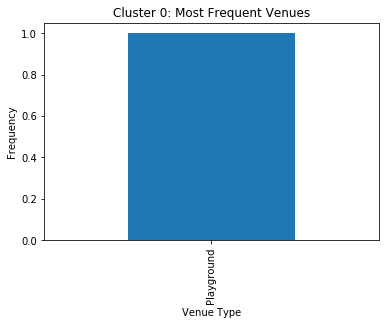

In [59]:
cluster_1['Category'].value_counts().plot(kind='bar')
plt.title('Cluster 0: Most Frequent Venues')
plt.xlabel('Venue Type')
plt.ylabel('Frequency')